In [ ]:
import gym
import numpy as np
import random

env = gym.make("FrozenLake-v1", map_name='4x4', is_slippery=False)

/usr/local/lib/python3.9/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.9/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
def create_random_sto_policy(env):
    policy = {}
    for key in range(0, env.observation_space.n):
        p = {}
        for action in range(0, env.action_space.n):
            p[action] = 1 / env.action_space.n
        policy[key] = p
    return policy

In [ ]:
policy = create_random_sto_policy(env)
policy

{0: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 1: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 2: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 3: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 4: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 5: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 6: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 7: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 8: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 9: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 10: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 11: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 12: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 13: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 14: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25},
 15: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25}}

In [ ]:
s=0
n = random.uniform(0,1)
top_range = 0
for prob in policy[s].items():
  top_range += prob[1]
  if n < top_range:
    action = prob[0]
    break

print(action)

1


In [ ]:
def TD_0(env, episodes=1000, gamma=0.9, alpha=0.4):

    V = np.zeros(env.observation_space.n)

    policy = create_random_sto_policy(env)

    for i in range(episodes):

        finished = False

        env.reset()
        s = env.s

        while not finished:
            #DO UZUPEŁNIENIA

            n = random.uniform(0,1)
            top_range = 0
            for prob in policy[s].items():
              top_range += prob[1]
              if n < top_range:
                action = prob[0]
                break

            prob, next_state, reward, done = env.P[s][action][0]

            V[s] = V[s] + alpha * (reward + gamma * V[next_state] - V[s])
            #print(f"V[s]: {V[s]}, Akcja: {action}, Stan: {s}, nowy stan: {next_state}, nagroda: {reward}")
            s = next_state
            if next_state == 15 or next_state == 5 or next_state == 7 or next_state == 11 or next_state == 12:
              finished = True
    return V

In [ ]:
V = np.zeros(env.observation_space.n)
env.reset()
env.observation_space.n
env.P[14][2]
prob, next_state, reward, done = env.P[14][2][0]
reward

1.0

In [ ]:
V = TD_0(env,episodes=500)

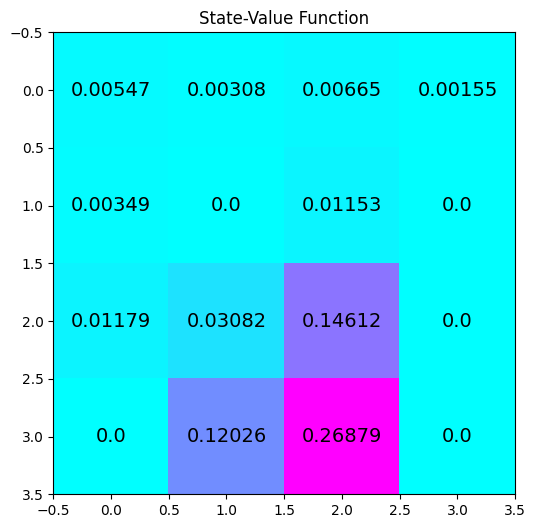

In [ ]:
from plot_utils import plot_values
plot_values(V)